<a href="https://colab.research.google.com/github/shannonshih/Tibame_GAD245-Practice-HW_0221/blob/main/1_02_%E7%89%B9%E5%BE%B5%E7%B8%AE%E6%94%BEScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特徵縮放Scaling

特徵縮放是將不同範圍或單位的數據轉換為統一範圍的過程。這個步驟對許多機器學習模型至關重要，因為它有助於提高模型的效能和穩定性。以下是需要進行縮放的幾個主要原因：

## 1. 不同特徵的範圍和單位差異
當不同特徵的範圍差異很大時，模型可能會偏向於範圍較大的特徵，從而影響預測結果的準確性。

例如：
- 年齡：範圍 [20, 70]（單位：年）
- 收入：範圍 [30000, 100000]（單位：美元）

如果不進行縮放，模型可能會過度關注收入這個特徵，而忽略年齡這個特徵，因為收入的範圍比年齡大很多。

## 2. 基於距離的算法（如 KNN、SVM 等）
許多基於距離的算法（例如 K最近鄰（KNN）、支持向量機（SVM）和 K 均值聚類）依賴數據點之間的距離來進行計算。如果特徵的尺度差異太大，距離計算會受到範圍較大的特徵影響，導致最終的預測結果不準確。

例如，在 KNN 中，計算距離時，每個特徵的範圍對距離計算貢獻不同。若一個特徵範圍很大，將主導距離的計算，從而影響預測結果。

## 3. 加速收斂速度（在梯度下降算法中）
在基於梯度下降的模型（如線性回歸、邏輯回歸、神經網絡等）中，特徵縮放有助於加速優化過程。如果數據的尺度差異太大，梯度下降的更新步長可能會不穩定，導致收斂過慢或陷入局部最小值。

## 4. 正則化（Regularization）
許多模型（例如 Lasso 和 Ridge 回歸）使用正則化來避免過擬合。正則化項會根據特徵的值進行懲罰，這樣尺度較大的變量將對正則化項產生更大的影響，從而影響模型的表現。通過縮放特徵，正則化的效果會均勻分布，避免某些特徵過度懲罰。

## 5. 提高數據的穩定性和一致性
如果數據本身存在較大的尺度差異（例如某些特徵的數值範圍非常大，某些則非常小），不進行縮放會導致模型無法有效學習，進而造成不穩定的預測結果。特徵縮放能夠將所有特徵放在相同的範圍內，這有助於提高模型的穩定性。

## 6. 減少異常值的影響
雖然縮放不能完全消除異常值的影響，但它能夠減少異常值對模型的影響。例如，使用 `RobustScaler` 這類的縮放方法時，可以減少異常值的影響，讓模型在面對異常數據時更加穩定。

---

## 常見的特徵縮放方法：

1. **標準化（Standardization）**：將數據轉換為均值為 0，標準差為 1 的分佈。
   - 使用 `StandardScaler`，適用於數據大致符合正態分佈的情況。
   
2. **最小-最大縮放（Min-Max Scaling）**：將數據縮放到 [0, 1] 或其他指定的範圍內。
   - 使用 `MinMaxScaler`，適用於需要將數據縮放到某個具體範圍的情況。
   
3. **最大絕對值縮放（MaxAbs Scaling）**：將數據縮放到 [−1, 1] 範圍內，適用於已經是稀疏矩陣的數據。
   - 使用 `MaxAbsScaler`，適用於數據範圍已經在 [-1, 1] 的情況。

4. **穩健縮放（Robust Scaling）**：使用數據的中位數和四分位距（IQR）進行縮放，對異常值不敏感。
   - 使用 `RobustScaler`，適用於數據中包含異常值的情況。

---

## 總結
特徵縮放有助於提高許多機器學習模型的性能，尤其是基於距離的算法和基於梯度的優化方法。通過將數據縮放到統一範圍，模型可以更加穩定並且有效地進行學習。


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#載入資料
data = pd.read_csv("/content/drive/MyDrive/AI人才應用/20250109T010859Z-001/2024-12 AI數據應用人才養成班/data/Automobile.csv")
data.head()

,symboling,Normalized-losses,make,Fuel-type,aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,bore,stroke,Compression-ratio,horsepower,Peak-rpm,City-mpg,Highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
data.columns

Index(['symboling', 'Normalized-losses', 'make', 'Fuel-type', 'aspiration',
       'Num-of-doors', 'Body-style', 'Drive-wheels', 'Engine-location',
       'Wheel-base', 'length', 'width', 'height', 'Curb-weight', 'Engine-type',
       'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'bore', 'stroke',
       'Compression-ratio', 'horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'price'],
      dtype='object')

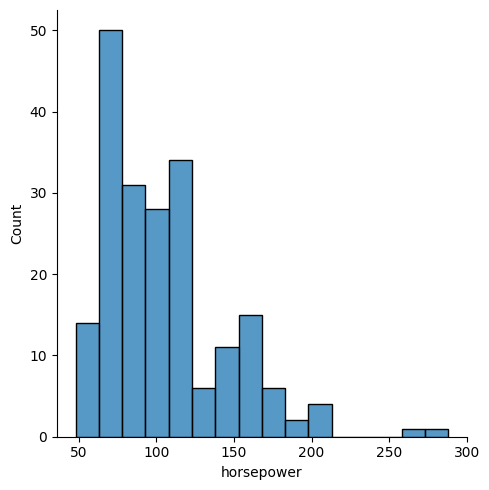

In [ ]:
sns.displot(data,x='horsepower')

In [ ]:
x = data['horsepower']

# MinMaxScaler
* 將數據縮放到指定的最小值和最大值之間，通常是 [0, 1]。
* 適用於要求特徵在固定範圍內的算法，例如神經網絡。

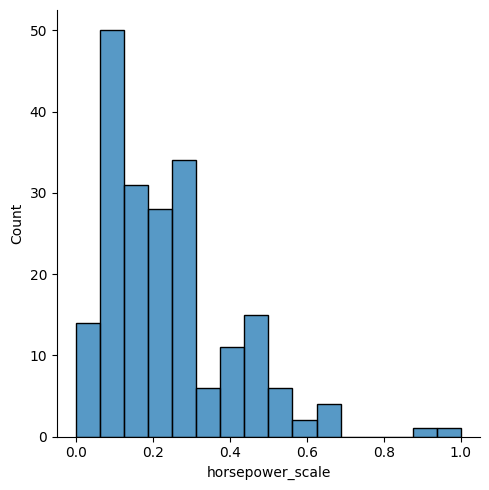

In [ ]:
x_std = (x - x.min()) / (x.max() - x.min())

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')

max=  [288.]
min=  [48.]


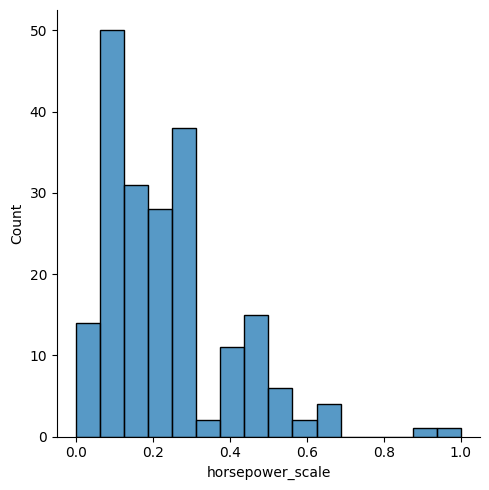

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x.values.reshape(-1, 1))
print('max= ', scaler.data_max_)
print('min= ', scaler.data_min_)
x_std = scaler.transform(x.values.reshape(-1, 1)).flatten()

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')

# MaxAbsScaler
* 將數據按最大絕對值進行縮放，適用於已經是稀疏矩陣或數據值已經在 [-1, 1] 範圍內的情況。
* 保持數據的零值不變，且不會改變數據的稀疏性。

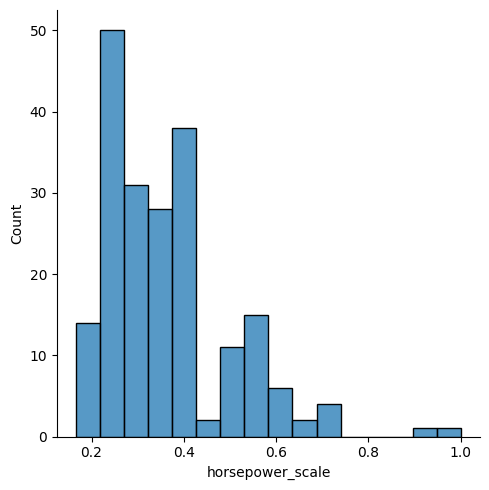

In [ ]:
x_std = x / x.abs().max()

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')

max_abs_=  [288.]


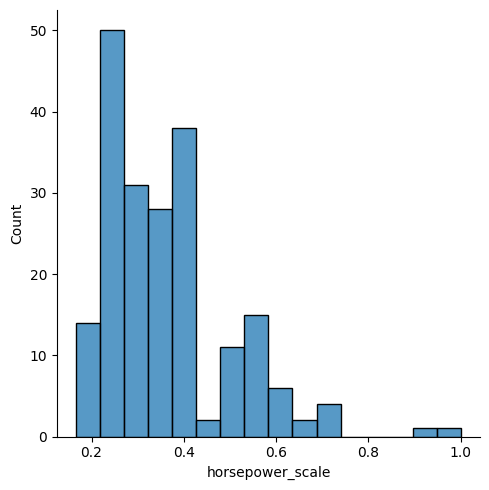

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(x.values.reshape(-1, 1))
print('max_abs_= ', scaler.max_abs_)
x_std = scaler.transform(x.values.reshape(-1, 1)).flatten()

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')

# StandardScaler
* 將數據標準化，使其均值為 0，標準差為 1。
* 適用於大多數機器學習模型，尤其是對特徵分佈沒有假設的模型。

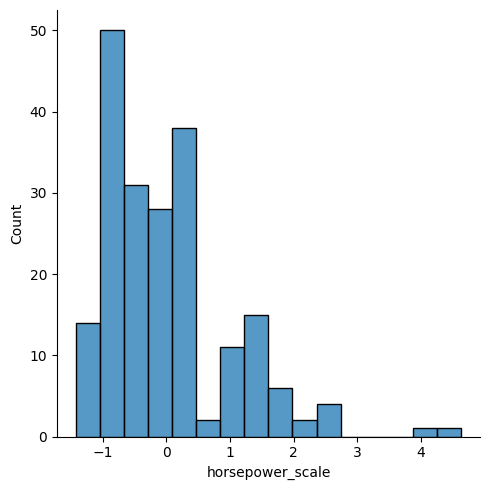

In [ ]:
x_std = (x - x.mean()) / x.std()

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')

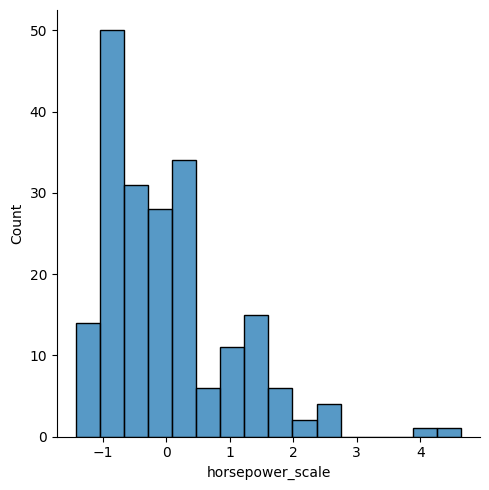

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x.values.reshape(-1, 1))
x_std = scaler.transform(x.values.reshape(-1, 1)).flatten()

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')

In [ ]:
# 驗證結果
print('標準差 = ', data['horsepower_scale'].std())
print('平均值 = ', data['horsepower_scale'].mean())

標準差 =  1.0024721916589532
平均值 =  -1.1594447350765182e-16


# RobustScaler
* 使用數據的中位數和四分位距來進行縮放，比標準化方法更不容易受異常值的影響。
* 適用於數據中有異常值的情況。

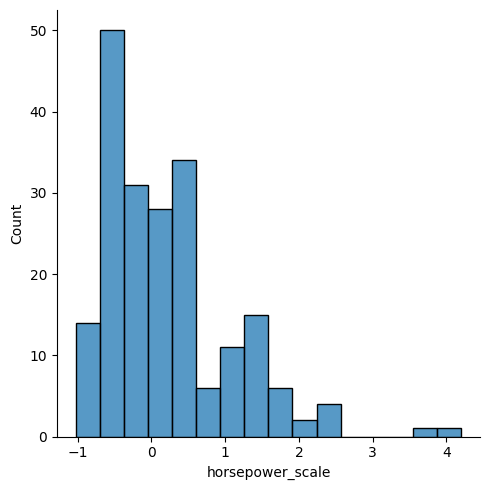

In [ ]:
x_std = (x - x.quantile(0.5)) / (x.quantile(0.75) - x.quantile(0.25))

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')

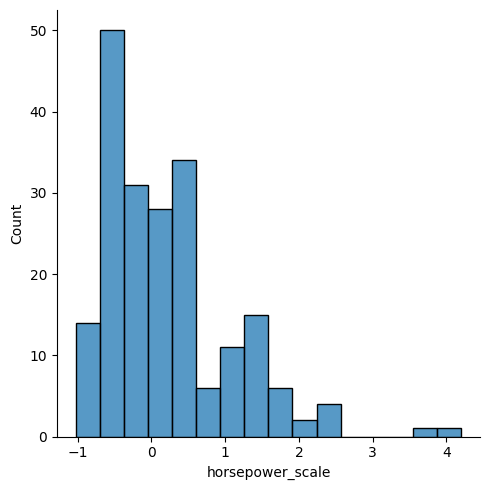

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x.values.reshape(-1, 1))
x_std = scaler.transform(x.values.reshape(-1, 1)).flatten()

data['horsepower_scale'] = x_std
sns.displot(data,x='horsepower_scale')